# ATP Tennis Data - Symmetric Raw Data


# Summary of Results







In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.decomposition import PCA
from datetime import datetime
import pickle
import json
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from util import jupyter_util as ju
from util.model_util import ModelWrapper, RSTATE, N_JOBS, MAX_ITER, LABEL_COL
import util.model_util as mu
import logging
import importlib

logging.basicConfig(level=logging.INFO)
%matplotlib inline
sns.set()


# date
DATE_FORMAT = '%Y-%m-%d %H:%m'
DATE = datetime.now().strftime(DATE_FORMAT)


DESCRIPTION = "raw-sym"

# sometimes I run these notebooks via command line. Environment variable is set so we know whether we are in DEBUG mode or not
# if you want to manually run this in DEBUG mode, change default value to True
DEBUG = bool(os.environ.get("IPYNB_DEBUG", False))

if DEBUG:
    FEATURE_FILE = f'../datasets/atp_matches_1985-2019_featuressym_test-raw_diff-ohe.csv'
    ModelWrapper.REPORT_FILE = '../reports/summary-test.csv'
    DESCRIPTION = f"{DESCRIPTION}-test"
else:

    FEATURE_FILE = f'../datasets/atp_matches_1985-2019_featuressym-raw_diff-ohe.csv'


START_YEAR = 1998
END_YEAR = 2018

feature_filter = ["util.model_util.BaseRawFilter"]

In [2]:
X_train, X_test, y_train, y_test = ModelWrapper.get_data(FEATURE_FILE, LABEL_COL, START_YEAR, END_YEAR, column_filters = feature_filter)
print(f'Final columns: {X_test.columns}')

INFO:util.model_util:loading ../datasets/atp_matches_1985-2019_featuressym-raw_diff-ohe.csv
INFO:util.model_util:Shape before filtering: (118478, 5261)
INFO:util.model_util:Adding filter: util.model_util.BaseRawFilter
INFO:util.model_util:Shape after filtering: (118478, 13)
INFO:util.model_util:Final Features shape: (118478, 13)


Final columns: Index(['draw_size', 'round_label', 'tourney_level_label', 'tourney_month',
       'tourney_year', 'p1_age', 'p1_ht', 'p1_rank', 'p1_seed', 'p2_age',
       'p2_ht', 'p2_rank', 'p2_seed'],
      dtype='object')


# Run our Models

In [3]:
models = [
    LogisticRegression(n_jobs = N_JOBS, verbose = 1, random_state = RSTATE),
    KNeighborsClassifier(n_jobs = N_JOBS),
    DecisionTreeClassifier(random_state = RSTATE),
    RandomForestClassifier(random_state=RSTATE, verbose=1),
    GradientBoostingClassifier(random_state=RSTATE, verbose=1, n_iter_no_change = 4),
    AdaBoostClassifier(random_state=RSTATE),
]



Running LogisticRegression
[LibLinear]

/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Model Score: 0.650472653612424

ROC/AUC Score: 0.6504717817167103
              precision    recall  f1-score   support

        Loss       0.65      0.65      0.65     14815
         Win       0.65      0.65      0.65     14805

    accuracy                           0.65     29620
   macro avg       0.65      0.65      0.65     29620
weighted avg       0.65      0.65      0.65     29620

      Loss   Win
Loss  9675  5140
Win   5213  9592


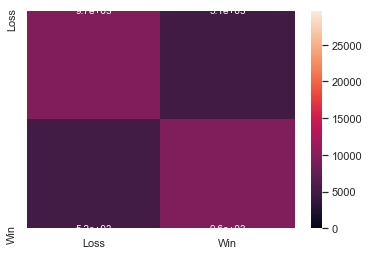

INFO:util.model_util:Saving model file: ../models/logisticregression-1998-2018-raw-sym.pkl
INFO:util.model_util:Reading report: ../reports/summary.csv


Saving report: ../reports/summary.csv


Running KNeighborsClassifier
Model Score: 0.6052667116812964

ROC/AUC Score: 0.6052670998147478
              precision    recall  f1-score   support

        Loss       0.61      0.60      0.60     14815
         Win       0.60      0.61      0.61     14805

    accuracy                           0.61     29620
   macro avg       0.61      0.61      0.61     29620
weighted avg       0.61      0.61      0.61     29620

      Loss   Win
Loss  8950  5865
Win   5827  8978


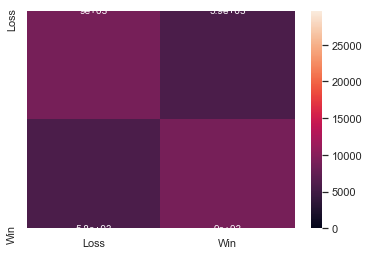

INFO:util.model_util:Saving model file: ../models/kneighborsclassifier-1998-2018-raw-sym.pkl
INFO:util.model_util:Reading report: ../reports/summary.csv


Saving report: ../reports/summary.csv


Running DecisionTreeClassifier
Model Score: 0.5978392977717758

ROC/AUC Score: 0.5978381577221166
              precision    recall  f1-score   support

        Loss       0.60      0.60      0.60     14815
         Win       0.60      0.59      0.60     14805

    accuracy                           0.60     29620
   macro avg       0.60      0.60      0.60     29620
weighted avg       0.60      0.60      0.60     29620

      Loss   Win
Loss  8907  5908
Win   6004  8801


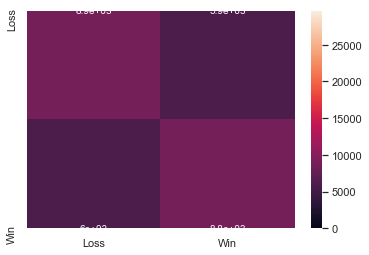

INFO:util.model_util:Saving model file: ../models/decisiontreeclassifier-1998-2018-raw-sym.pkl
INFO:util.model_util:Reading report: ../reports/summary.csv
/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Saving report: ../reports/summary.csv


Running RandomForestClassifier


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


Model Score: 0.6390614449696151

ROC/AUC Score: 0.6390358836320018
              precision    recall  f1-score   support

        Loss       0.62      0.71      0.66     14815
         Win       0.66      0.56      0.61     14805

    accuracy                           0.64     29620
   macro avg       0.64      0.64      0.64     29620
weighted avg       0.64      0.64      0.64     29620

       Loss   Win
Loss  10589  4226
Win    6465  8340


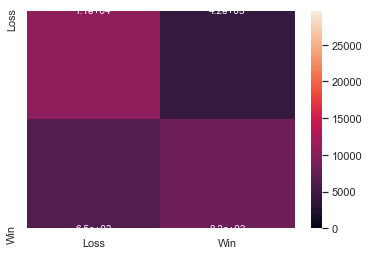

INFO:util.model_util:Saving model file: ../models/randomforestclassifier-1998-2018-raw-sym.pkl
INFO:util.model_util:Reading report: ../reports/summary.csv


Saving report: ../reports/summary.csv


Running GradientBoostingClassifier
      Iter       Train Loss   Remaining Time 
         1           1.3664            4.98s
         2           1.3503            5.04s
         3           1.3358            4.98s
         4           1.3236            5.00s
         5           1.3133            4.99s
         6           1.3039            4.95s
         7           1.2963            4.94s
         8           1.2891            4.85s
         9           1.2828            4.81s
        10           1.2775            4.72s
        20           1.2397            4.08s
        30           1.2090            3.50s
        40           1.1938            3.06s
        50           1.1840            2.53s
        60           1.1740            2.00s
        70           1.1687            1.46s
        80           1.1616            0.97s
        90           1.1541            0.48s
       100           1.1492            0.00s
Model Score: 0.680452397

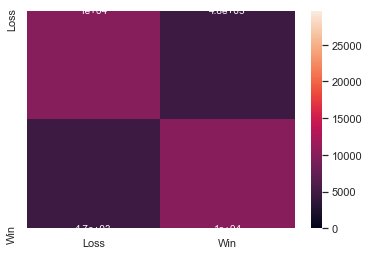

INFO:util.model_util:Saving model file: ../models/gradientboostingclassifier-1998-2018-raw-sym.pkl
INFO:util.model_util:Reading report: ../reports/summary.csv


Saving report: ../reports/summary.csv


Running AdaBoostClassifier
Model Score: 0.6615462525320729

ROC/AUC Score: 0.6615423500215366
              precision    recall  f1-score   support

        Loss       0.66      0.67      0.67     14815
         Win       0.67      0.65      0.66     14805

    accuracy                           0.66     29620
   macro avg       0.66      0.66      0.66     29620
weighted avg       0.66      0.66      0.66     29620

      Loss   Win
Loss  9972  4843
Win   5182  9623


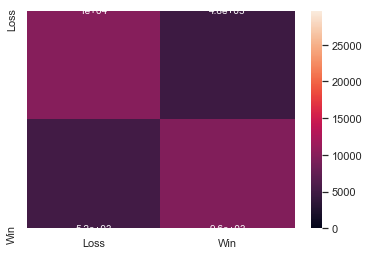

INFO:util.model_util:Saving model file: ../models/adaboostclassifier-1998-2018-raw-sym.pkl
INFO:util.model_util:Reading report: ../reports/summary.csv


Saving report: ../reports/summary.csv


In [4]:
for model in models:
    print(f'\n\nRunning {type(model).__name__}')
    mw = mu.ModelWrapper(model,
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                        column_filters = feature_filter)
    mw.fit(X_train, y_train)
    predict = mw.predict(X_test)
    mw.analyze(y_test)
    plt.show()
    mw.save()

# Summary

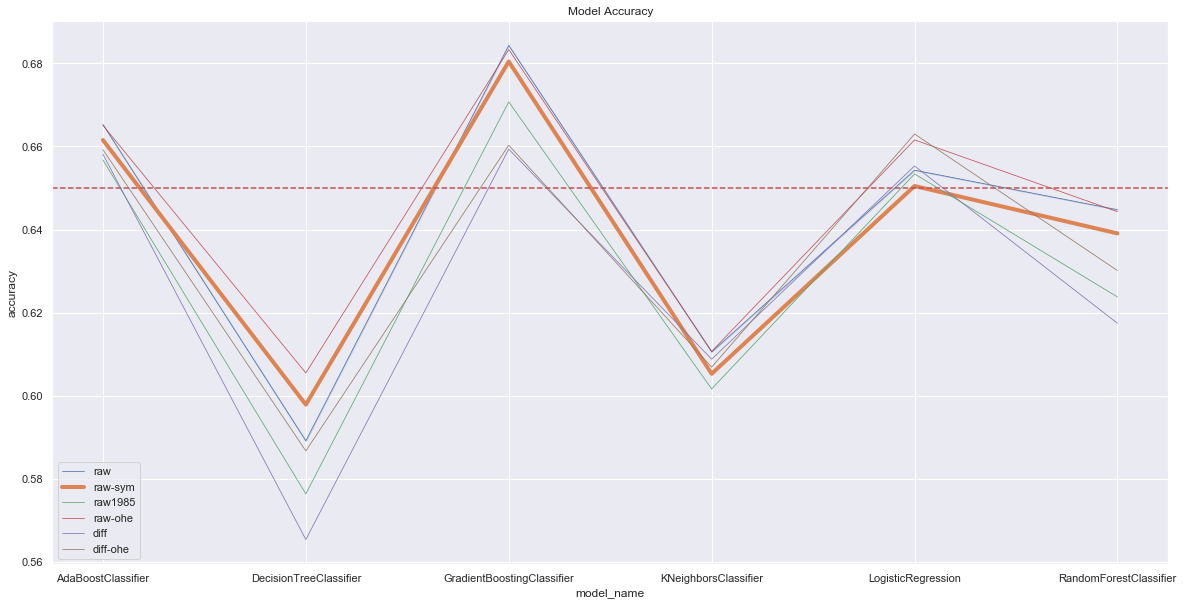

In [5]:
report = pd.read_csv(ModelWrapper.REPORT_FILE)

f, a = plt.subplots(1, 1, figsize=(20, 10))

descs = report.description.unique()

for desc in descs:
    report_desc = report[report.description == desc]
    if desc == DESCRIPTION:
        sns.lineplot(x="model_name", y="accuracy", data=report_desc, label=desc, linewidth=4)
    else:
        sns.lineplot(x="model_name", y="accuracy", data=report_desc, label=desc, linewidth=0.75)

a.axhline(0.65, ls='--', color='r')
a.set_title(f"Model Accuracy")
_ = a.legend(loc="lower left")

Best Model: GradientBoostingClassifier


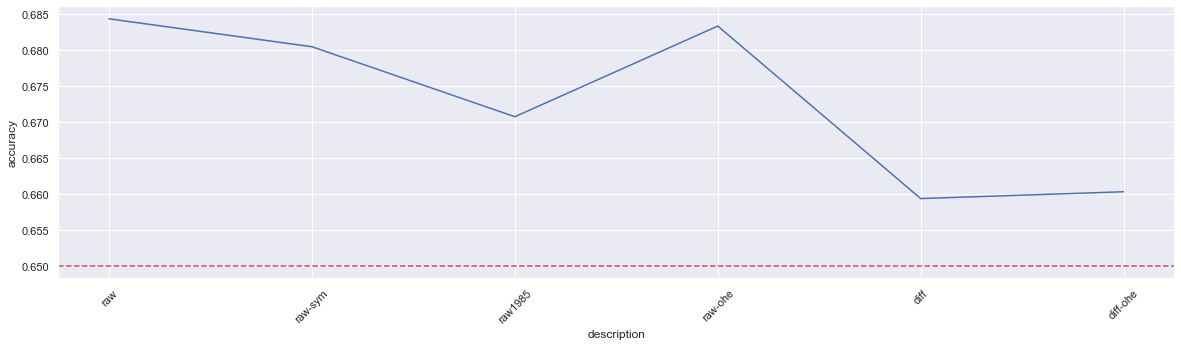

In [6]:
best_model = report.loc[report[report.description == DESCRIPTION].accuracy.idxmax()].model_name
print(f'Best Model: {best_model}')

dt_report = report[(report.model_name == 'GradientBoostingClassifier')]

f, a = plt.subplots(1, 1, figsize=(20, 5))
_ = sns.lineplot(x="description", y="accuracy", data=dt_report, ax=a, sort=False)
_ = a.axhline(0.65, ls='--', color='r')
_ = a.set_label(f"{best_model} Accuracy")
_ = plt.xticks(rotation=45)


In [7]:
print(f'Last Finished: {datetime.now().strftime(DATE_FORMAT)}')

Last Finished: 2019-10-28 13:10
